<a href="https://colab.research.google.com/github/insaiyancvk/Computer-Vision/blob/main/Dere_Net_dirty_work_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. See what data we got

In [ ]:
# !mv /content/drive/MyDrive/kaggle.json /root/.kaggle
# !kaggle datasets download jahelsantiagoleon/female-anime-characters-anime-dataset 
# !unzip female-anime-characters-anime-dataset.zip -d .

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, random

In [7]:
import torch
import torchvision

from torch.utils.data import DataLoader
from torchvision.utils import make_grid

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

from tqdm import tnrange,tqdm_notebook, tqdm

In [8]:
class_list = [
    'dandere',
    'deredere',
    'himdere',
    'kundere',
    'tsundere',
    'yandere',
    'yangire'
]
TRAIN_PATH = ".\waifus_images\waifus_images_train"

In [10]:
FOLDERS = {
    "PROCESSED": os.path.join("waifus","waifus_images"),
    "TRAIN": os.path.join("waifus","waifus_images","waifus_images_train"),
    "TEST": os.path.join("waifus","waifus_images","waifus_images_val"),
    "WORKSPACE": os.path.join("waifus","Workspace"),
    "MODELS" : os.path.join("waifus","Workspace","Models"),
    "LOSS" : os.path.join("waifus","Workspace","Loss"),
    "ACCURACY" : os.path.join("waifus","Workspace","Accuracy"),
    "LOSS_TRAIN" : os.path.join("waifus","Workspace","Loss","Train"),
    "LOSS_TEST" : os.path.join("waifus","Workspace","Loss","Test"),
    "ACCURACY_TRAIN" : os.path.join("waifus","Workspace","Accuracy","Train"),
    "ACCURACY_TEST" :os.path.join("waifus","Workspace","Accuracy","Test")
}

In [11]:
FOLDERS

{'ACCURACY': 'waifus/Workspace/Accuracy',
 'ACCURACY_TEST': 'waifus/Workspace/Accuracy/Test',
 'ACCURACY_TRAIN': 'waifus/Workspace/Accuracy/Train',
 'LOSS': 'waifus/Workspace/Loss',
 'LOSS_TEST': 'waifus/Workspace/Loss/Test',
 'LOSS_TRAIN': 'waifus/Workspace/Loss/Train',
 'MODELS': 'waifus/Workspace/Models',
 'PROCESSED': 'waifus/waifus_images',
 'TEST': 'waifus/waifus_images/waifus_images_val',
 'TRAIN': 'waifus/waifus_images/waifus_images_train',
 'WORKSPACE': 'waifus/Workspace'}

In [12]:
for key in FOLDERS:
    if not os.path.isdir("./"+FOLDERS[key]):
        print(key," directory doesn't exist. Creating one.")
        os.mkdir("./"+FOLDERS[key])
        print(key, " directory created.")
    else:
        print(key, "exists")

PROCESSED exists
TRAIN exists
TEST exists
WORKSPACE  directory doesn't exist. Creating one.
WORKSPACE  directory created.
MODELS  directory doesn't exist. Creating one.
MODELS  directory created.
LOSS  directory doesn't exist. Creating one.
LOSS  directory created.
ACCURACY  directory doesn't exist. Creating one.
ACCURACY  directory created.
LOSS_TRAIN  directory doesn't exist. Creating one.
LOSS_TRAIN  directory created.
LOSS_TEST  directory doesn't exist. Creating one.
LOSS_TEST  directory created.
ACCURACY_TRAIN  directory doesn't exist. Creating one.
ACCURACY_TRAIN  directory created.
ACCURACY_TEST  directory doesn't exist. Creating one.
ACCURACY_TEST  directory created.


In [13]:
class_list

['dandere', 'deredere', 'himdere', 'kundere', 'tsundere', 'yandere', 'yangire']

In [14]:
path = "./dataset/waifus/waifus_images/waifus_images_train/Dandere/Kosaki Onodera40.png"

In [15]:
w = cv2.imread(path, 3)
RGB_img = cv2.cvtColor(w, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

error: ignored

In [ ]:
RGB_img.shape, type(RGB_img)

((300, 168, 3), numpy.ndarray)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision.io import read_image

In [ ]:
imgs = []
for i in os.listdir(FOLDERS["TRAIN"]):
    aimgs = os.listdir(os.path.join(FOLDERS["TRAIN"],i))[:5]
    aimgs = [os.path.join(FOLDERS["TRAIN"],i,a) for a in aimgs]
    imgs.append(aimgs)
#     print(os.path.join(FOLDERS["TRAIN"],i)[:5])
#     imgs.append(os.path.join(FOLDERS["TRAIN"],i,os.listdir(os.path.join(FOLDERS["TRAIN"],i)))[:5])
#     print(os.listdir(os.path.join(FOLDERS["TRAIN"],i))[:5])
#     for j in os.listdir(os.path.join(FOLDERS["TRAIN"],i))[:5]:
#         print(os.listdir(os.path.join(FOLDERS["TRAIN"],i))[:5])
#         imgs[a][b].append(read_image(os.path.join(TRAIN_PATH, i, j)))
#         a+=1
#     b+=1


(7, 5)

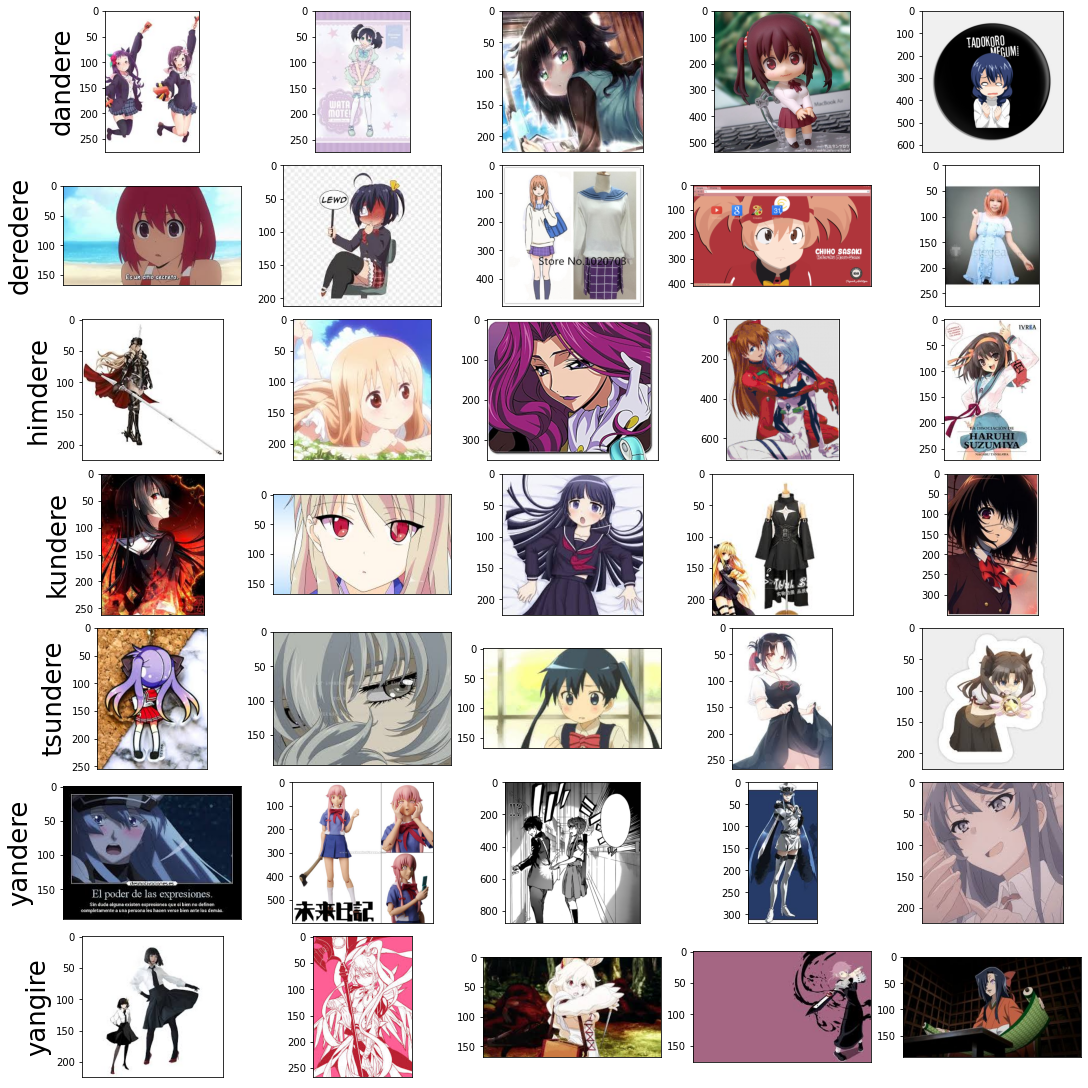

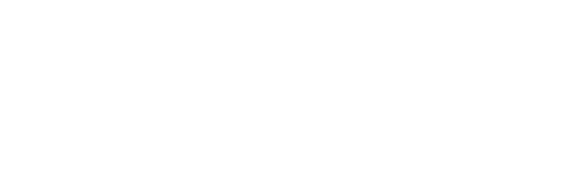

In [ ]:
## Print out images
fig, axs = plt.subplots(7,5, figsize=(15,15), constrained_layout=True)
fig = plt.figure(figsize=(10,3))

for ax, row in zip(axs[:,0], class_list):
    ax.set_ylabel(row, rotation=90, fontsize=26)

a, b = 0, 0
for i in os.listdir(TRAIN_PATH):
    imgs = os.listdir(os.path.join(TRAIN_PATH, i))
    random.shuffle(imgs)
    for j in imgs:
        img2 = cv2.imread(os.path.join(TRAIN_PATH, i, j))
        try:
            img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        except:
            print(os.path.join(TRAIN_PATH, i, j))
            continue
        rm = axs[a][b].imshow(img2)
        plt.axis('off')
        rm.axes.get_xaxis().set_visible(False)
#         rm.axes.get_yaxis().set_visible(False)
        b+=1
        if b>4:
            b=0
            break
    a+=1
    if a>6:
        break

**NOTE:** Use image size: 224,224 or 256,256 (since we ain't got chad GPUs)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Transform training data

In [ ]:
transformations = transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transformations_test = transforms.Compose([
    transforms.Resize([256,256]),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

class ImageFolderWithPaths(torchvision.datasets.ImageFolder):    
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]
        tuple_with_path = (original_tuple + (path,))
        return tuple_with_path

train_dataset = ImageFolderWithPaths(root="./dataset/waifus/waifus_images/waifus_images_train/", transform = transformations)
# train_dataset = datasets.ImageFolder("./dataset/waifus/waifus_images/waifus_images_train/", transform = transformations)
train_loader = DataLoader(dataset = train_dataset, batch_size = 16,shuffle=True)
items = iter(train_loader)
image, label, p = items.next()


test_dataset = torchvision.datasets.ImageFolder("./dataset/waifus/waifus_images/waifus_images_val/", transform=transformations_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16,
                                         shuffle=True)


print(len(train_dataset))

13925


In [ ]:
items = iter(train_loader)
image, label, p = items.next()

In [ ]:
p[10]

'./dataset/waifus/waifus_images/waifus_images_train/himedere\\Satsuki Kiryuin76.png'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


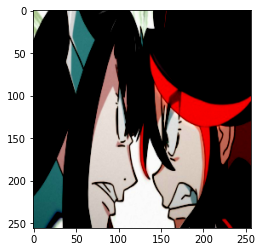

In [ ]:
plt.imshow(np.transpose(image[10], (1,2,0)))

## The Model:

In [ ]:
class Net(nn.Module):
    def __init__(self):
        
        super(Net, self).__init__()
        
        self.pool = nn.MaxPool2d(5, 5)
        
        self.conv1 = nn.Conv2d(3, 6, 7)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 16, 3)
        
        self.fc1 = nn.Linear(16, 7)
        #self.fc2 = nn.Linear(500, 50)
        #self.fc3 = nn.Linear(50, 7)

    def forward(self, x):
        
        # Conv layer 1
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Conv layer 2
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # Conv layer 3
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool(x)

        #print("Tensor shape: ",x.shape)
        
        # Flatten the batch
        x = x.view(x.size(0),-1)
        #print(x.shape)
        
        # Dense layer 1
        x = self.fc1(x)
        #x = F.relu(self.fc2(x))
        #x = self.fc3(x)
        return x

In [ ]:
net =  Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)
items = iter(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


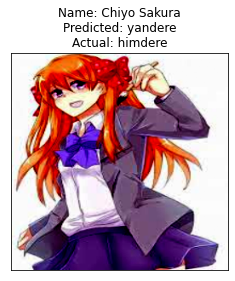

In [ ]:
# Testing if all the parameters of the NN are set properly

image, label, p = items.next()
x = net(image[0].unsqueeze(0))
# print(x.shape)
f = plt.imshow(np.transpose(image[0], (1,2,0)));
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)
plt.title(
    "Name: "+''.join([i for i in os.path.splitext(os.path.basename(p[0]))[0] if not i.isdigit()])+"\n"+
    "Predicted: "+class_list[x.cpu().data.numpy().argmax()]+"\n"+"Actual: "+class_list[label[0].item()+1],
    loc='center'
);

## Steps
- pass imgae to the NN
- calculate loss
- backprop
- update weights

In [ ]:
def train_step(model, images, labels, loss_func, optim, device):
    
    # Set the gradiant values to zero because torch accumulates the values
    optim.zero_grad()
    
    # Predictions from the model
    outputs = model(images.to(device))
    
    # Calculate the loss
    loss = loss_func(outputs, labels.to(device))
    
    # Finds the derivative by applying chain rule
    loss.backward()
    
    # Move the loss function towards the local/global minima
    optim.step()
    
    # return the outputs and loss by moving them to CPU
    return outputs.cpu().detach().numpy(), loss.cpu().item()

In [ ]:
net =  Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

In [ ]:
testiter = iter(train_loader)
image, label, _ = next(testiter)
preds, loss = train_step(
    net, 
    image, 
    label, 
    criterion, 
    optimizer, 
    "cuda")

In [ ]:
loss

1.8533270359039307

In [ ]:
np.average(np.argmax(preds, axis=1) == label.cpu().detach().numpy())*100

25.0

In [ ]:
np.argmax(preds, axis=1)

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64)

In [ ]:
np.argmax(preds[1])

6

In [ ]:
preds.shape, label.cpu().detach().numpy().shape

((16, 7), (16,))

5. Build a training loop
    1. Move to GPU
    2. Define the training function
    3. Calculate the running loss and store the same in list and later convert to np array and save the np array.
    4. Calculate the accuracy after every batch. Calculate the average of same and store the values in a list 
       and later convert it to np array and save theh np array.
    5. After every epoch, test the model loss and accuracy 
       (by following the same steps as done for training ie, move to list, convert to np array, save the np array) with the test data.


In [ ]:
def epoch(model, train_loader, loss_func, optim, device):
    mean_loss = 0
    model = model.to(device)
    for image, label in tqdm(train_loader):
        loss = train_step(model, image, label, loss_func, optim, device)
        mean_loss += loss/len(train_loader)
    return mean_loss

In [ ]:
net =  Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9)

In [ ]:
epoch(net, train_loader, criterion, optimizer, device="cuda")

  2%|█▋                                                                               | 18/871 [00:06<03:00,  4.73it/s]D:\Coding\myrepos\Computer-Vision\dereenv\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████| 871/871 [03:43<00:00,  3.90it/s]


1.9074843924847578

In [ ]:
res = net(image[0].unsqueeze(0).cuda())

In [ ]:
res

tensor([[-0.1173, -0.1199,  0.1329,  0.2926,  0.3461, -0.1499,  0.1409]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
label[0]

tensor(4)

In [ ]:
res.cpu().data.numpy().argmax()

4

In [ ]:
# use python list to store loss and later convert it to np array and delete python list

pyloss = []
for i in range(10):
    pyloss.append(i)
nploss = np.array(pyloss, dtype="float64")
print("pyloss before del: ", pyloss)
del pyloss
print(nploss)

pyloss before del:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
x

tensor([[ 0.2325,  0.0674, -0.0641, -0.0441,  0.1456,  0.1779,  0.2395]],
       grad_fn=<AddmmBackward>)

In [ ]:
tes = [1 if net(image[i].unsqueeze(0).cuda()).cpu().data.numpy().argmax() == label[i] else 0 for i in range(10)]

In [ ]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-4.7650e-02,  7.7965e-02,  6.1381e-02, -4.2459e-02, -1.1829e-02,
                          3.4830e-02, -7.7022e-02],
                        [-1.3962e-02,  6.8885e-02, -1.6537e-02,  5.6191e-02, -3.6477e-02,
                         -6.6178e-02,  4.1583e-03],
                        [ 3.1963e-02, -1.4617e-02,  3.0298e-02, -5.5396e-02, -1.7704e-04,
                         -2.9664e-03,  5.2326e-03],
                        [ 3.5460e-02,  6.9157e-02, -5.5254e-02, -7.4308e-03,  4.4056e-02,
                         -4.7191e-03, -7.6123e-02],
                        [ 2.9503e-03,  7.0806e-02, -8.3984e-02,  3.2365e-02, -7.4138e-02,
                         -1.3867e-02, -6.8980e-02],
                        [-7.0695e-02,  2.5971e-02, -4.8771e-02, -6.1777e-02, -6.7494e-02,
                         -7.3755e-02, -6.3706e-02],
                        [ 7.0368e-02,  2.3675e-02, -7.7775e-02,  7.4999e-02,  4.9906e-02,
                          6.

In [ ]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': tensor([[[[ 4.1772e-02,  4.6386e-02,  3.7139e-02,  2.8831e-02,  1.2046e-02,
               1.4159e-03,  1.7098e-03],
             [ 4.1783e-02,  4.1015e-02,  3.0438e-02,  1.6739e-02,  7.2340e-04,
              -3.8403e-03,  2.9342e-03],
             [ 3.3879e-02,  3.0395e-02,  2.2365e-02,  9.1122e-03,  6.5250e-04,
               4.7763e-03,  1.4419e-02],
             [ 3.0136e-02,  2.6518e-02,  1.7585e-02,  4.4089e-03,  8.9547e-04,
               2.3401e-03,  1.6563e-02],
             [ 3.0620e-02,  2.1740e-02,  7.7112e-03,  8.2436e-04, -4.4799e-03,
              -2.3937e-03,  1.4382e-02],
             [ 2.3280e-02,  1.6441e-02,  3.6832e-03, -2.9148e-03, -5.4497e-03,
              -5.6341e-04,  1.4410e-02],
             [ 1.2070e-02,  1.1348e-02,  7.1764e-03,  3.2737e-03,  6.9680e-04,
               3.9707e-03,  1.2335e-02]],
   
            [[ 4.8708e-02,  4.9983e-02,  3.8166e-02,  2.8286e-02,  1.0263e-02,
              -3.5417e-03, -4.7380e-03],
    

In [ ]:
EPOCH = 1
PATH = "./dataset/waifus/models/"
MODEL1 = "3conv_3RLU_3MP2d_1d_crossentropy_sgd.pt"
LOSS = 1.9

In [ ]:
# Save the model
torch.save({
    'epoch': EPOCH,
    'model_state_dict': net.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': LOSS
}, 
    PATH+MODEL1)

In [ ]:
# Load the saved model
checkpoint = torch.load(PATH+MODEL1)
net.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])